## Análise exploratória de dados 🔎

Estudo realizado a partir de um dataset com dados sobre lançamentos na plataforma Spotify ao longo do ano de 2025.

[Link para o dataset utilizado](https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025/data)

### Importação das bibliotecas e definição de estilo de plotagem

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "#535353",
    "figure.facecolor": "#191414",
    "text.color": "white",
    "grid.color": "#737373",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
})

spotify_palette =sns.blend_palette(['#191414', '#1DB954'], as_cmap=True)


### Leitura dos dados

In [2]:
df = pd.DataFrame(pd.read_csv('data\spotify_data clean (1).csv'))

### Exibição dos dados

In [3]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [4]:
df.info()


print(f"\nQuantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

### Descrição das variáveis

---
Colunas:

  *   track_id: Identificador único da música no Spotify
  *   track_name: Nome da música
  *   track_number: Número da música
  *   track_popularity: Nível de popularidade da música (0-100)
  *   explicit: Se o conteúdo é explícito (True/False)
  *   artist_name: Nome do Artista
  *   artist_popularity: Nível de popularidade do artista (0-100)
  *   artist_followers: Quantidade de seguidores do artista
  *   artist_genres: Gêneros musicais do artista
  *   album_id: Identificador único do álbum
  *   album_name: Nome do álbum
  *   release_month: Data de lançamento do álbum
  *   album_total_tracks: Quantidade de faixas no álbum
  *   album_type: Tipo de álbum (Álbum/Single)
  *   track_duration_min: Tempo de duração da música em minutos
---



### Adição de coluna para mês de lançamento de cada música

In [5]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['release_month'] = df['album_release_date'].dt.month

meses = {
    1 : 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'
}
df['release_month_name'] = df['release_month'].map(meses)
meses_ordem = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
df['release_month_name'] = pd.Categorical(df['release_month_name'], categories=meses_ordem, ordered=True)



### Classificação das variáveis

---
Com base na avaliação preliminar da estrutura dos dados, podemos afirmar que:

  * O conjunto de dados possui 8582 unidades amostrais com 11 variáveis análitcas e 6 variáveis que representam identificadores únicos, sem valor direto para análise:

  * Classificação das variáveis analíticas:

      * Quantitativa contínua; `track_duration_min`
      * Quantitativa discreta: `artist_popularity`, `track_popularity`,`artist_followers`, `album_total_tracks`
      * Qualitativa nominal: `explicit`,`artist_genres`, `album_type`, `track_name`, `artist_name`, `album_name`, `track_id`
      * Qualitativa ordinal: `release_month` (criado a partir de `album_release_date`)
<br>

  * Variáveis com identificadores únicos (serão removidos):
      
      * Qualitativa nominal: `album_id`
      * Qualitativa ordinal: `track_number`, `album_release_date` (substituído pelo mês)
      

  * A variável `artist_genres` também será desconsiderada para fins de análise, visto que possui valores compostos por listas vazias e com preenchimento subjetivo à forma como os próprios artistas se classificam, sem padrões descritivos.
---

## Limpeza dos dados 🧹

In [6]:
drop_ids = ['album_id', 'artist_genres', 'track_number','album_release_date']
df.drop(drop_ids, axis=1, inplace=True)


## Dicionário dos dados 📙

In [7]:
df_dict = pd.DataFrame([

    {
        "variavel": "track_name",
        "descricao": "Nome da música",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "track_popularity",
        "descricao": "Nível de popularidade da música (0-100)",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "explicit",
        "descricao": "Se o conteúdo é explícito (True/False)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "artist_name",
        "descricao": "Nome do Artista",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "artist_popularity",
        "descricao": "Nível de popularidade do artista (0-100)",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "artist_followers",
        "descricao": "Quantidade de seguidores do artista",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "album_name",
        "descricao": "Nome do álbum",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "album_total_tracks",
        "descricao": "Quantidade de faixas no álbum",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "album_type",
        "descricao": "Tipo de álbum (Álbum/Single)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "track_duration_min",
        "descricao": "Tempo de duração da música em minutos",
        "tipo": "quantitativa",
        "subtipo": "continua"
    },
    {
        "variavel": "album_release_date",
        "descricao": "Data de lançamento do álbum",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },
    {
        "variavel": "release_month",
        "descricao": "Mês de lançamento da música",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },
    {
        "variavel": "track_id",
        "descricao": "Identificador único da música no Spotify",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    }
])

## Resumo da descrição estatística 📈

In [8]:
df.describe(include='object')

,track_id,track_name,artist_name,album_name,album_type
count,8582,8582,8579,8582,8582
unique,8582,7462,2547,4870,3
top,61GEP8lryEfcuEgBMbRmNi,Home,Taylor Swift,Nevermind (Super Deluxe Edition),album
freq,1,8,324,70,5856


## Distribuição das variáveis 📊

#### Variáveis qualitativas

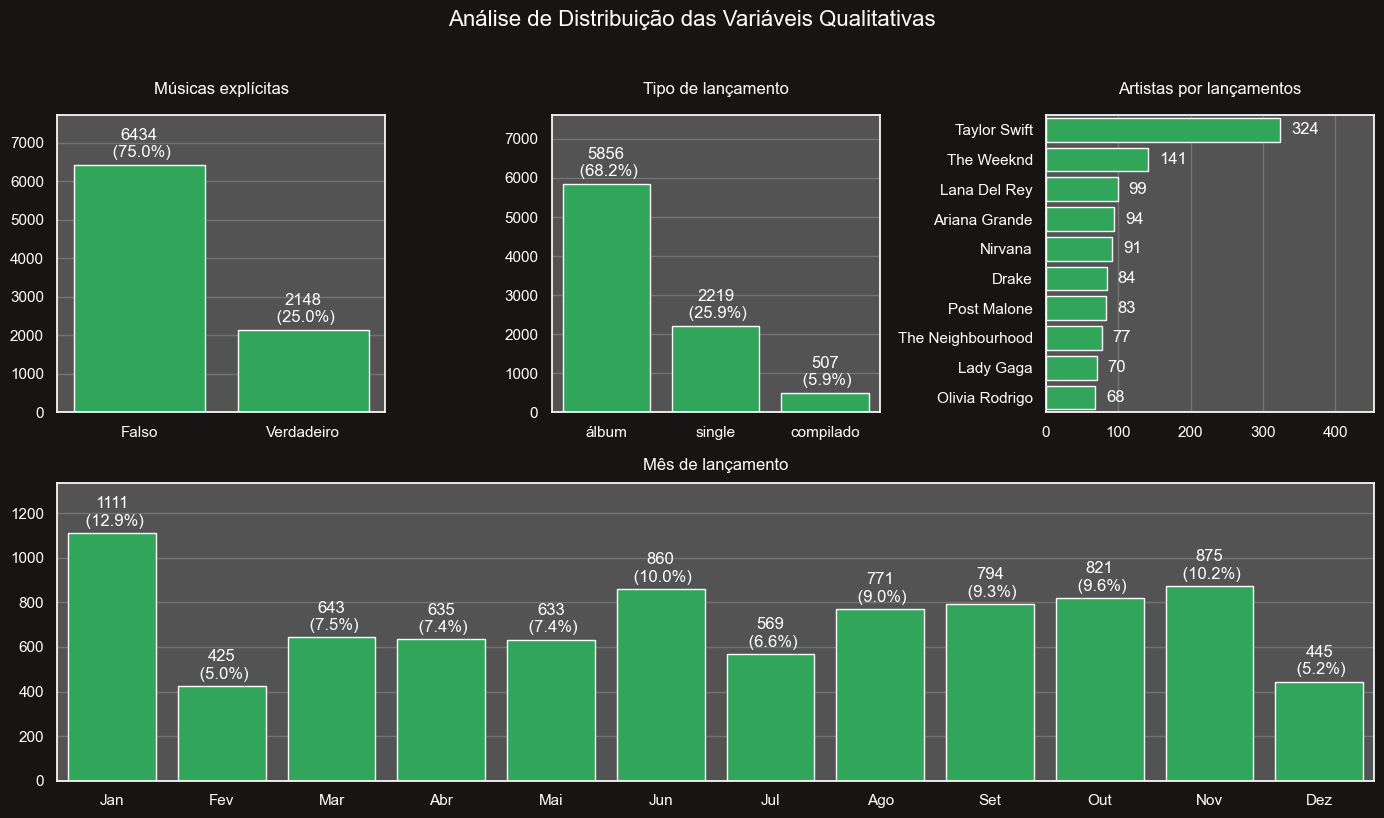

In [9]:
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()


df['explicit'] = df['explicit'].replace({ True: 'Verdadeiro', False: 'Falso'})
df['album_type'] = df['album_type'].replace({ 'album': 'álbum', 'compilation': 'compilado'})

#Foi criada uma nova categoria para visualizarmos os artistas com mais músicas listadas no dataset
top10_artists = df['artist_name'].value_counts().head(10).index

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(x='explicit', data=df, ax=ax1, order=["Falso", "Verdadeiro"], color='#1DB954')
ax1.set_title('Músicas explícitas', pad=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
labels1 = [f'{v}\n ({v/len(df):.1%})' for v in df['explicit'].value_counts()]
ax1.bar_label(ax1.containers[0], labels=labels1, color='white', padding=3)
ax1.margins(y=0.2)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(x='album_type', data=df, ax=ax2, color='#1DB954')
ax2.set_title('Tipo de lançamento', pad=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
labels2 = [f'{v}\n ({v/len(df):.1%})' for v in df['album_type'].value_counts()]
ax2.bar_label(ax2.containers[0], color='white', padding=3, labels=labels2)
ax2.margins(y=0.3)

ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(data=df, y='artist_name', ax=ax3, order=top10_artists, color='#1DB954')
ax3.set_title('Artistas por lançamentos', pad=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.bar_label(ax3.containers[0], color='white', padding=8)
ax3.margins(x=0.4)

ax4 = fig.add_subplot(gs[1, 0:3])
sns.countplot(x='release_month_name', data=df, ax=ax4, color='#1DB954')
ax4.set_title('Mês de lançamento', pad=10)
ax4.set_xlabel('')
ax4.set_ylabel('')
labels4 = [f'{v}\n ({v/len(df):.1%})' for v in df['release_month_name'].value_counts(sort=False)]
ax4.bar_label(ax4.containers[0], color='white', padding=3, labels=labels4)
ax4.margins(y=0.2)

fig.suptitle("Análise de Distribuição das Variáveis Qualitativas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

---
Acerca da distribuição dos dados qualitativos neste dataset, é possível apontar que:

  * Dentre os lançamentos a maior parte consiste em músicas que não são classificadas como explícitas (75%);

  * A maior parte das músicas foi lançada como parte de um álbum (68,2%), seguido pelas que foram lançadas como singles (25,9%), e, por último, partes de um compilado (5,9%).

  * Em relação aos lançamentos, o mês de janeiro concentra a maior quantidade de lançamentos (12,9%), enquanto o mês subsequente, fevereiro, a menor quantidade mensal de lançamentos (5%). Apesar disso, a quantidade absoluta de lançamentos se aproxima de 50% para os dois semestres do ano.
---

#### Variáveis quantitativas

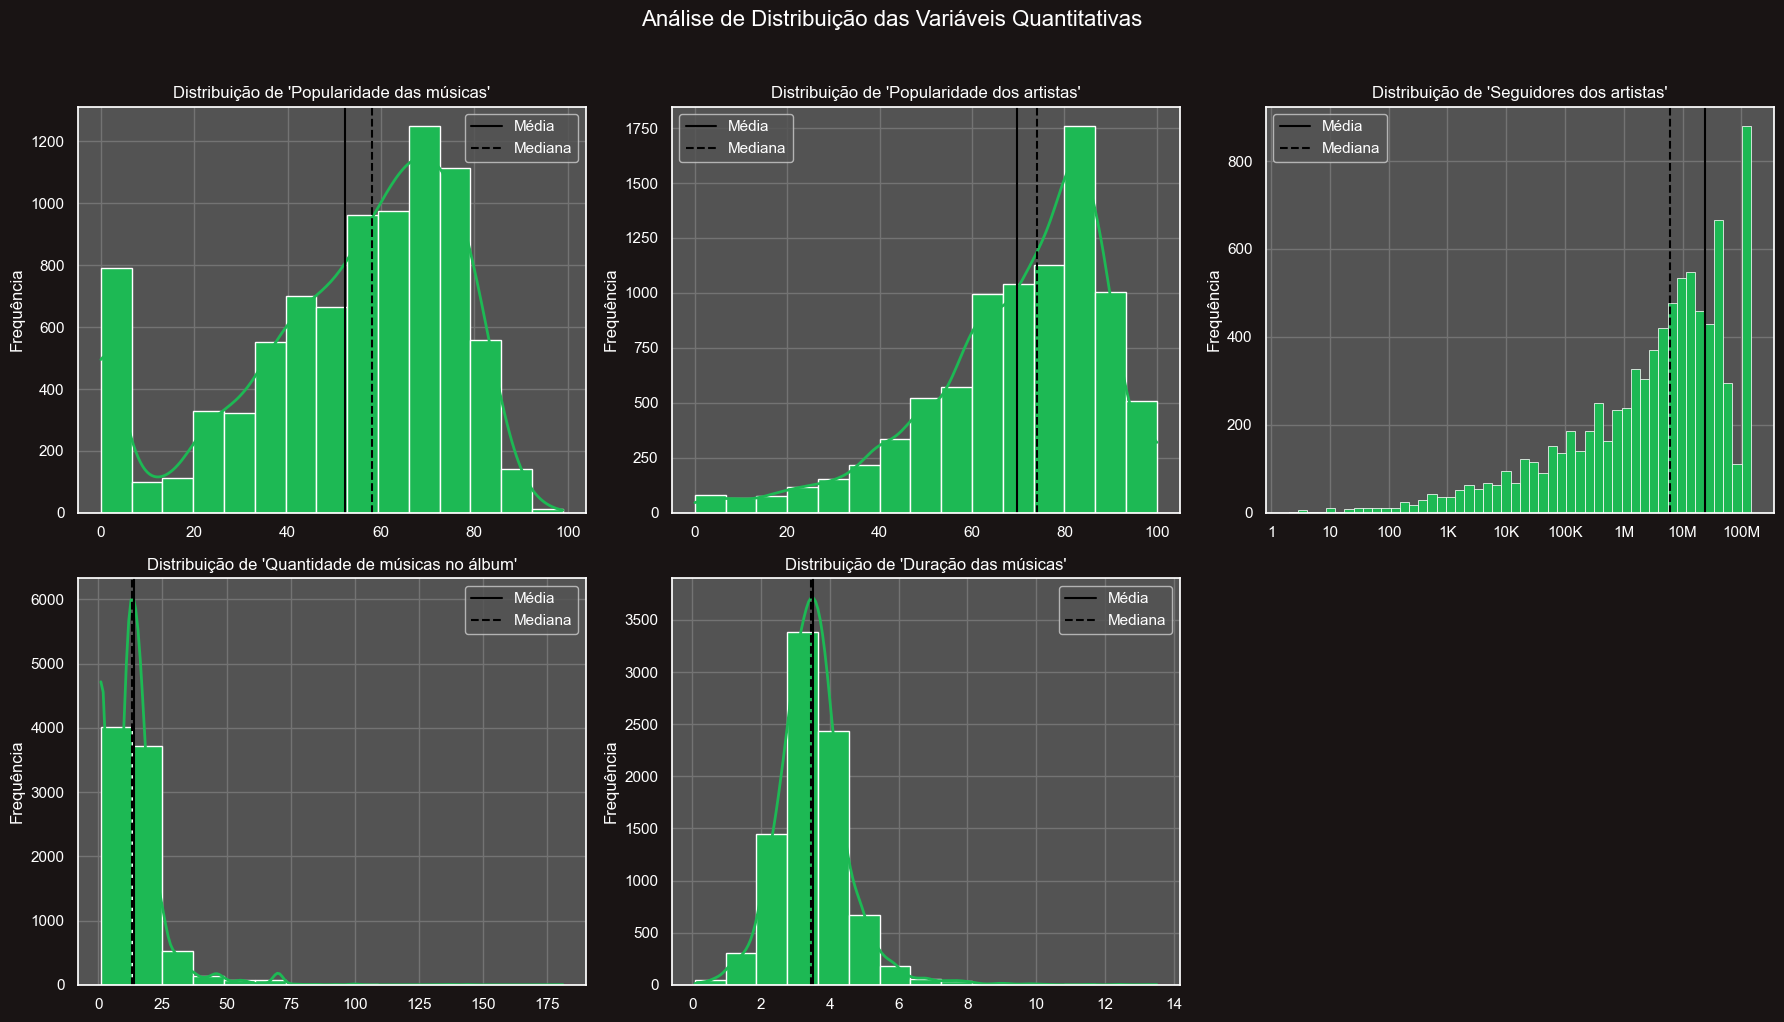

,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [10]:
def formatar_milhoes(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.0f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K'
    return f'{x:.0f}'

titulos_graficos = {
    "track_duration_min": "Duração das músicas",
    "artist_popularity": "Popularidade dos artistas",
    "track_popularity": "Popularidade das músicas",
    "artist_followers": "Seguidores dos artistas",
    "album_total_tracks": "Quantidade de músicas no álbum"
}

variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))


axes_flat = axes.flatten()

for i, variavel in enumerate(variaveis_quantitativas):
    ax = axes_flat[i]
    if variavel == 'artist_followers':
      sns.histplot(data=df, x=variavel, ax=ax, alpha=0.8, facecolor="#1DB954", bins=50, log_scale=True, kde=True)
      ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhoes))
    else:
      sns.histplot(data=df, x=variavel, ax=ax, alpha=0.8, kde=True, facecolor="#1DB954", edgecolor="white", bins=15, line_kws=dict(color="white", linewidth=2))
    ax.axvline(df[variavel].mean(), color='black', linestyle="-", label="Média")
    ax.axvline(df[variavel].median(), color='black', linestyle="--", label="Mediana")
    ax.set_title(f"Distribuição de '{titulos_graficos.get(variavel)}'", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frequência")
    ax.legend()


for j in range(len(variaveis_quantitativas), len(axes_flat)):
    axes_flat[j].set_visible(False)

fig.suptitle("Análise de Distribuição das Variáveis Quantitativas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
print('\n')

df[['track_popularity','artist_popularity','artist_followers','album_total_tracks','track_duration_min']].describe()

---
Acerca da distribuição dos dados quantitativos neste dataset, é possível apontar que:

  * A maior parte das músicas possui popularidade concentrada entre 50-80 na escala de 0-100, com média aproximada de 52 e mediana aproximada de 58;

  * Na popularidade dos artistas, as escalas predominantes flutuam entre 60-90, com média aproximada de 69 e mediana aproximada de 74.

  * A maior predominância em quantidade de seguidores se situa entre 5 a 15 milhões, com mediana em aproximadamente 6.1 milhões de seguidores.
---

## Análise bivariada

### Relação entre Variáveis Quantitativas

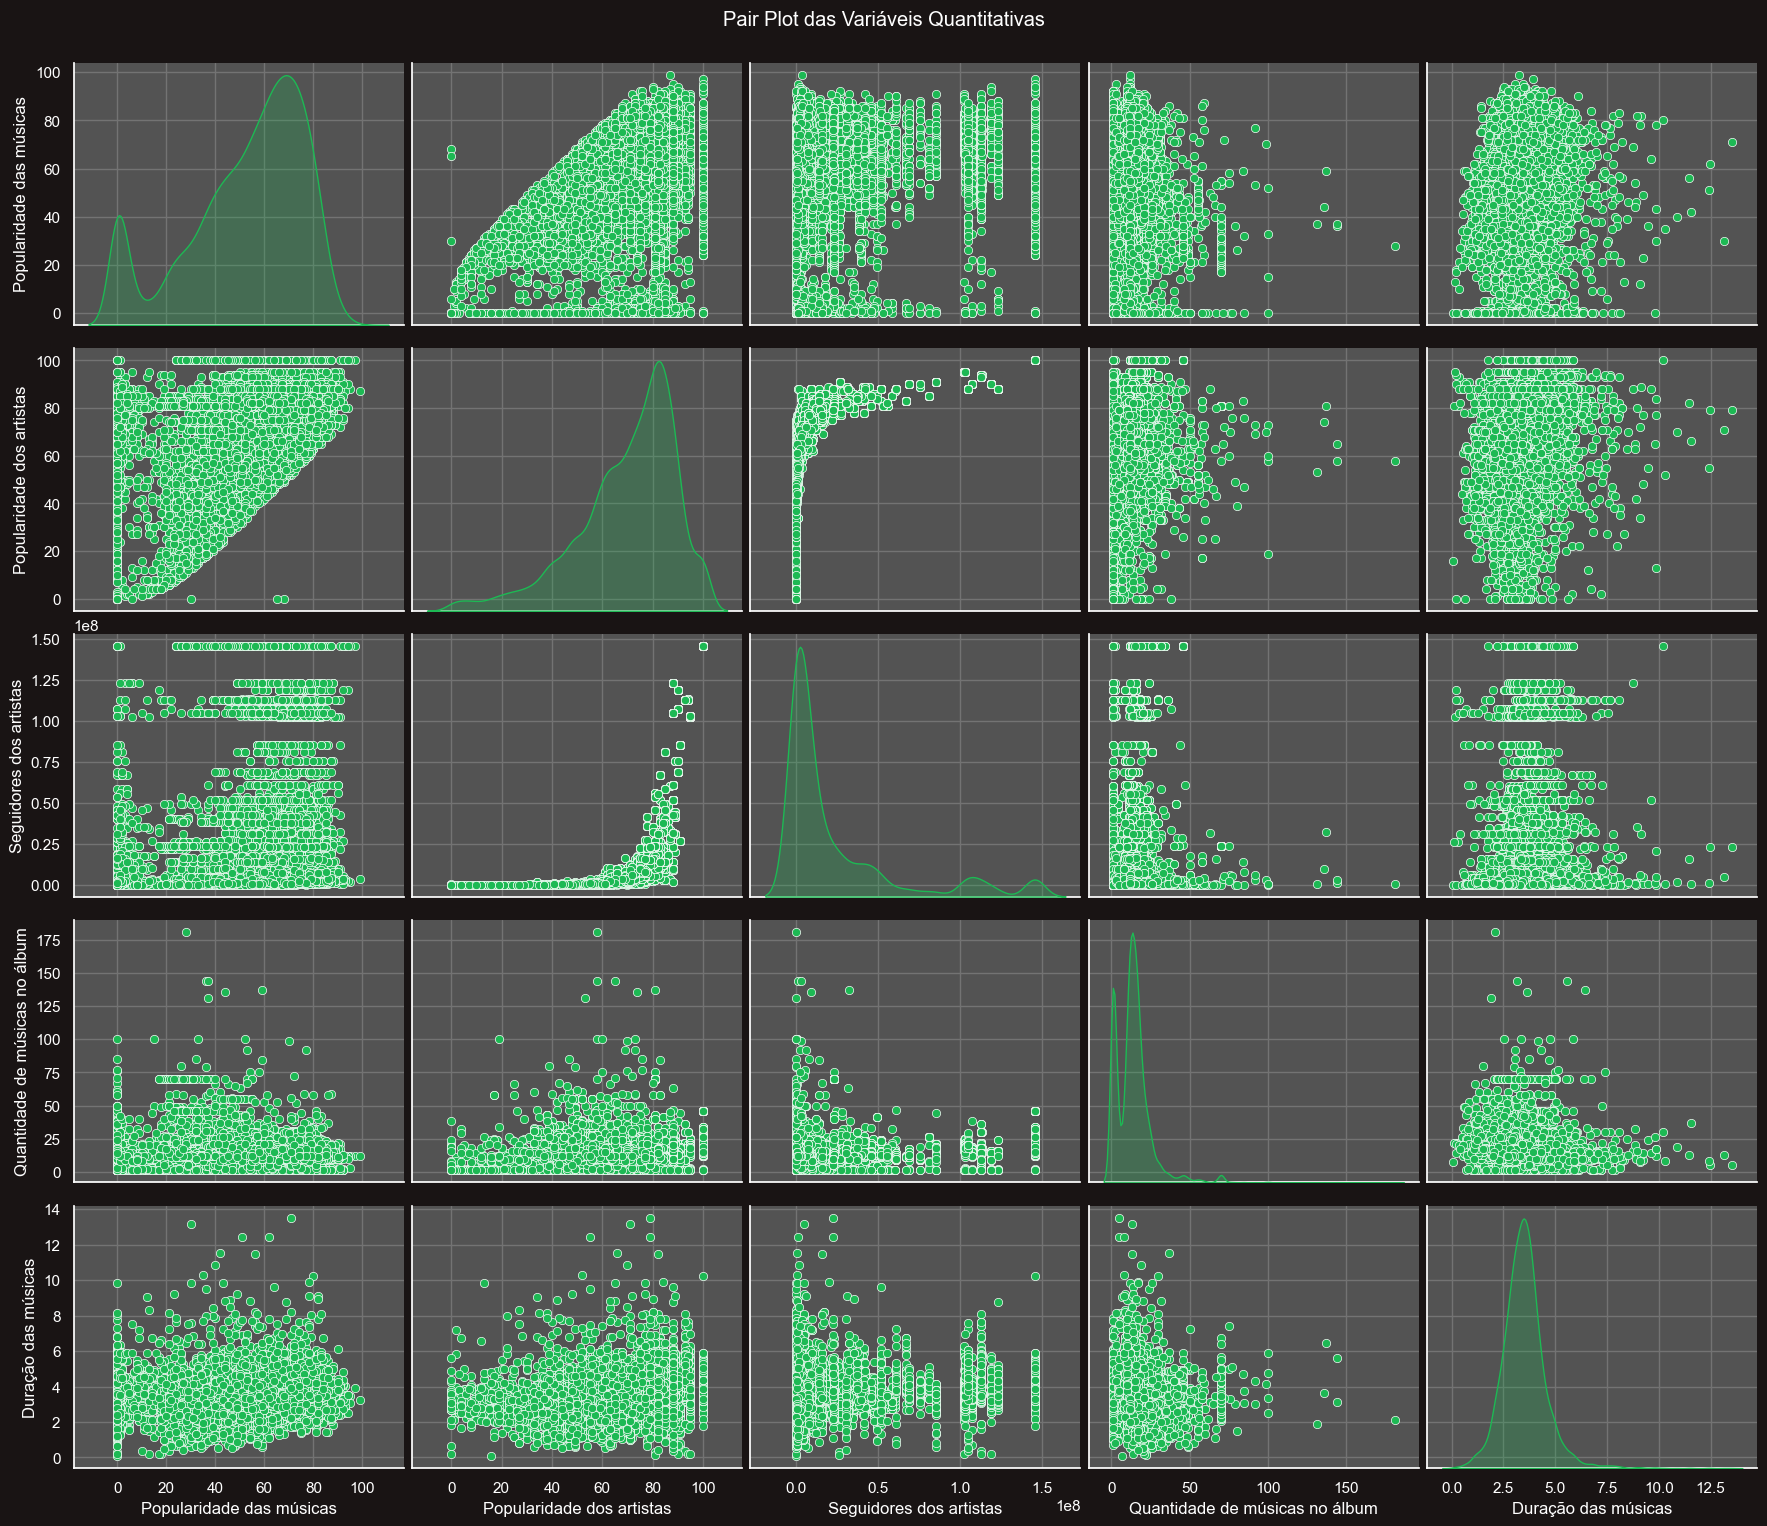

In [11]:
df_pairplot = df[variaveis_quantitativas].rename(columns=titulos_graficos)

sns.pairplot(df_pairplot, diag_kind='kde', plot_kws={'color': '#1DB954'}, diag_kws={'color': '#1DB954'}, height=3, aspect=1.2)
plt.suptitle('Pair Plot das Variáveis Quantitativas', y=1.02)
plt.show()

### Mapa de calor da matriz de correlação

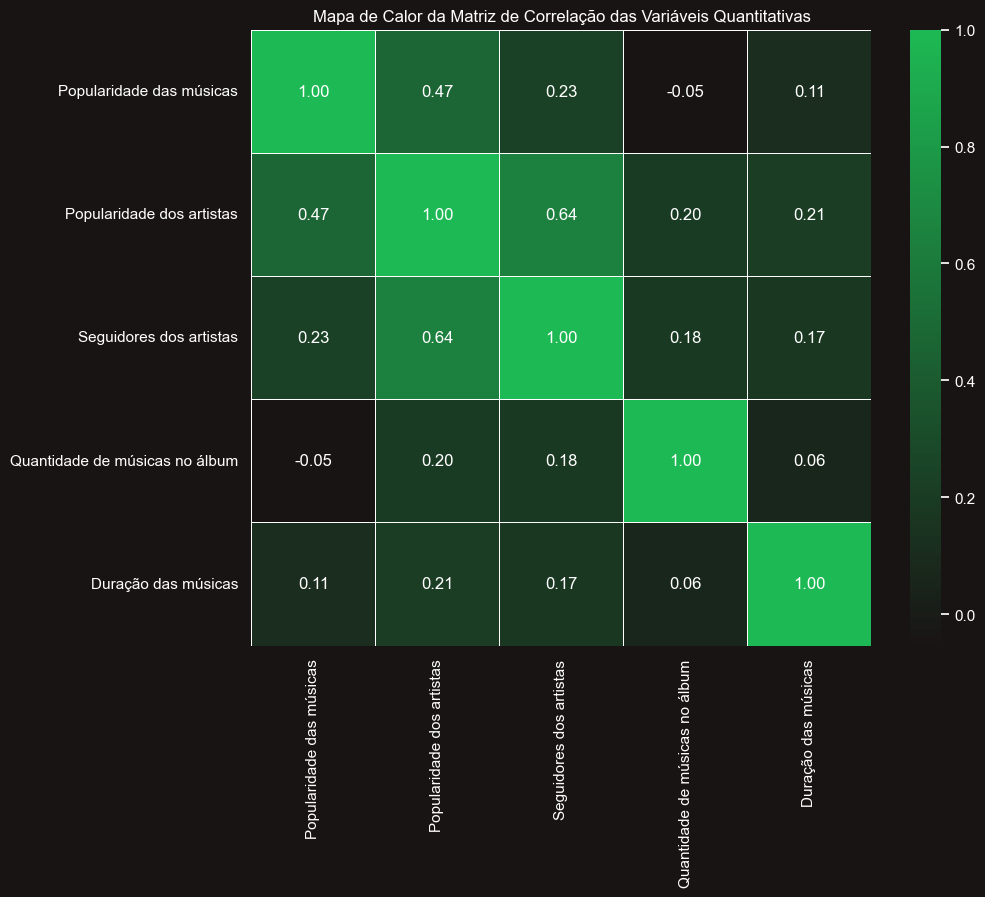

In [12]:
correlation_matrix = df_pairplot.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=spotify_palette, fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação das Variáveis Quantitativas')
plt.show()

---
A análise bivariada dos dados nos permite destacar alguns aspectos acerca da relação entre variáveis:

  * Há uma forte correlação (0.64) entre a `quantidade de seguidores de um artista` e a `popularidade do artista`;

  * Há uma correlação moderada (0.47) entre a `popularidade da música` e a `popularidade do artista`;

  * Em geral, as demais variáveis apontam correlações ínfimas ou baixas.
---

## Conclusões da análise exploratória 📍

---

  * Em geral, o dataset está bem estruturado, com poucos valores nulos ou problemas com tipos de valor;

  * Realizar uma análise multivariada de dados pode ser determinante para que seja possível mensurar o impacto exercido nas variáveis subjacentes;

  * A variável `gênero dos artistas` pode ser reconsiderada para uma análise minuciosa, se devidamente tratada para limpeza de dados inválidos ou irrelevantes.

  * Agrupar valores para correlacionar aspectos entre questões como `músicas explícitas` e a `popularidade das músicas` pode fornecer insights mais aprofundados sobre fatores que se mostram determinantes para a popularidade de uma música.

---

## Hipóteses 👆

  1. Artistas populares podem ter canções mais famosas, enquanto as canções de artistas menos populares, em sua maioria, tendem a ser menos famosas;

  2. Há uma tendência de que artistas mais populares possuam mais seguidores; contudo, essa relação não é linear, ocorrendo predominantemente para aqueles situados na faixa de popularidade entre 80 e 100;

  3. Preliminarmente, é possível observar que a duração das músicas e a quantidade de músicas lançadas no álbum não apresentam correlações significativas no resultado das demais variáveis.
